### Libraries

In [1]:
from urllib.parse import urlparse
from urllib.parse import urldefrag

from urllib.request import urlopen
from file_storage import FileStorage

from bs4 import BeautifulSoup
from urllib.parse import urljoin

from queue import Queue

from tqdm import tqdm_notebook

---
###### Some functions

In [2]:
def download_from_the_internet(url):
    try:
        return urlopen(url).read().decode('utf-8')
    except KeyboardInterrupt:
        raise
    except:
        return None

In [3]:
def extract_links_from_html(url, html):
    parser = BeautifulSoup(html, "lxml")
    return [urljoin(url, link.get('href')) for link in parser.findAll('a')]

---
###### Solution

In [16]:
fs = FileStorage('storage')

q = Queue()
q.put('https://simple.wikipedia.org/wiki/Main_Page') 

s = set()
s.add('https://simple.wikipedia.org/wiki/Main_Page')

current_qsize = []

In [17]:
not_articles = ['User_talk:', 'upload.wikimedia.org', 'Special:', 'File:', 'Wikipedia_talk:', 'Talk:', 'Help:',
                'Template_talk:', 'Template:', 'User:', 'Wikipedia_talk:', 'Wikipedia:', 'Module:', 'MediaWiki:',]

In [27]:
for i in tqdm_notebook(range(83836 + 36069 + 3390 + 111659, 300000)):
    
    if q.qsize() == 0:
        break
    
    current_qsize.append(q.qsize())
    
    url = q.get()
    html = download_from_the_internet(url)
    
    if html is None:
        continue
    
    # write pair (url, html) to file
    if ('Category:' not in url):
        fs.write(url, html)
    
    # add all links from url
    for link in extract_links_from_html(url, html):
      
        if link is None:
            continue
            
        link = urldefrag(link).url
        parsed_url = urlparse(link)
        if parsed_url.netloc != 'simple.wikipedia.org' or len(parsed_url.path.split('/')) < 2 or parsed_url.path.split('/')[1] != 'wiki':
            continue
        if all(map(lambda x: x not in link, not_articles)) and link not in s:
            q.put(link)
            s.add(link)

##### Выведем график, который показывает, как менялся размер очереди в зависимости от количества обработанных страниц

[]

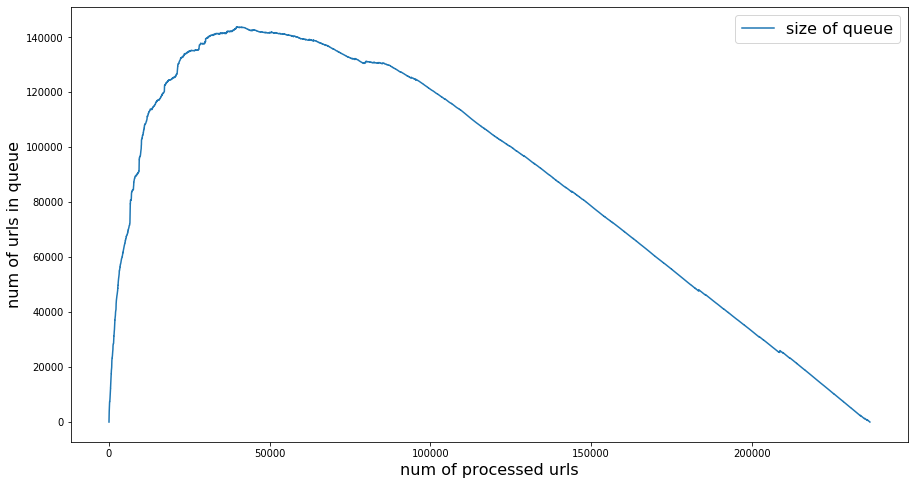

In [29]:
import numpy as np
from matplotlib import pyplot as plt

plt.figure(figsize=(15, 8))
plt.plot(np.arange(len(current_qsize)), current_qsize, label='size of queue')
plt.xlabel('num of processed urls', fontsize=16)
plt.ylabel('num of urls in queue', fontsize=16)
plt.legend(fontsize=16)
plt.plot()

### Выводы

Скрипт выкачал 189363 статьи, а на самом деле их всего 155460.

то есть я не смог отфильтровать 33903 страницы, которые не являются статьями.